In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sn
import random
import datetime as dt
import folium as f
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from patsy import dmatrices
import statsmodels.api as sm

In [2]:
merge = pd.read_csv(r'C:\Users\Joyce Huang\Downloads\DBA5104 - Introduction to Network Science & Analytics\final_project\2019_hub.csv')
merge_2 = pd.read_csv(r'C:\Users\Joyce Huang\Downloads\DBA5104 - Introduction to Network Science & Analytics\final_project\2020_hub.csv')
airport = pd.read_csv(r'C:\Users\Joyce Huang\Downloads\DBA5104 - Introduction to Network Science & Analytics\final_project\airport_vs_country.csv')
airport_des = pd.read_csv(r'C:\Users\Joyce Huang\OneDrive - National University of Singapore\DBA5104 - Introduction to Network Science & Analytics\final_project\airport_vs_country_des.csv')

In [3]:
hub_2019 = pd.merge(merge, airport, on ='origin', how ="inner")
hub_2019 = hub_2019.sort_values(by = 'degree_out', ascending=False)
#hub_2019

hub_2020 = pd.merge(merge_2, airport, on ='origin', how ="inner")
hub_2020 = hub_2020.sort_values(by = 'degree_out', ascending=False)
#hub_2020

### Origin Airports with the highest out-degree value

In [4]:
hub_2019_origin = hub_2019.groupby(['Name','degree_out','Country','Location','origin'], sort=True)[['latitude_1','longitude_1']].max().reset_index()
hub_2019_origin = hub_2019_origin.sort_values(by = 'degree_out', ascending=False)
#hub_2019_origin

hub_2020_origin = hub_2020.groupby(['Name','degree_out','Country','Location','origin'], sort=True)[['latitude_1','longitude_1']].max().reset_index()
hub_2020_origin = hub_2020_origin.sort_values(by = 'degree_out', ascending=False)
#hub_2020_origin

### Destination Airports with the highest in-degree value

In [5]:
hub_2019_des = pd.merge(merge, airport_des, on ='destination', how ="inner")
hub_2019_destination = hub_2019_des.groupby(['Name','degree_in','Country','Location','destination'], sort=True)[['latitude_2','longitude_2']].max().reset_index()
hub_2019_destination = hub_2019_destination.sort_values(by = 'degree_in', ascending=False)
#hub_2019_destination

hub_2020_des = pd.merge(merge_2, airport_des, on ='destination', how ="inner")
hub_2020_destination = hub_2020_des.groupby(['Name','degree_in','Country','Location','destination'], sort=True)[['latitude_2','longitude_2']].max().reset_index()
hub_2020_destination = hub_2020_destination.sort_values(by = 'degree_in', ascending=False)
#hub_2020_destination

### Plot the aiport hubs in 2019

In [6]:
m = f.Map(location=hub_2019_origin[['latitude_1','longitude_1']].iloc[1], zoom_start=12)
m

for i in range(0,1000):
    f.CircleMarker(location=[hub_2019_origin['latitude_1'].iloc[i], hub_2019_origin['longitude_1'].iloc[i]],
                  radius=1,
                  color='darkblue',
                  popup=hub_2019_origin['origin'].iloc[i]).add_to(m)
m

for k in range(0,1000):
    f.CircleMarker(location=[hub_2019_destination['latitude_2'].iloc[k], hub_2019_destination['longitude_2'].iloc[k]],
                  radius=1,
                  color='red',
                  popup=hub_2019_destination['destination'].iloc[i]).add_to(m)
m

### Plot the aiport hubs in 2020

In [7]:
m = f.Map(location=hub_2020_origin[['latitude_1','longitude_1']].iloc[1], zoom_start=12)
m

for i in range(0,1000):
    f.CircleMarker(location=[hub_2020_origin['latitude_1'].iloc[i], hub_2020_origin['longitude_1'].iloc[i]],
                  radius=1,
                  color='darkblue',
                  popup=hub_2020_origin['origin'].iloc[i]).add_to(m)
m

for k in range(0,1000):
    f.CircleMarker(location=[hub_2020_destination['latitude_2'].iloc[k], hub_2020_destination['longitude_2'].iloc[k]],
                  radius=1,
                  color='red', popup=hub_2020_destination['destination'].iloc[i]).add_to(m)
m
   

### Further analysis on 2019 origin airport hubs (Country and City level)

In [43]:
hub_2019 = hub_2019.groupby(['Country','Location','Name','origin','destination','degree_in','degree_out'], sort=True)['nbr_of_trips'].sum().reset_index()
hub_2019 = hub_2019[hub_2019.origin != hub_2019.destination]
hub_2019 = hub_2019.sort_values(by = 'degree_out', ascending=False)
#hub_2019

hub_2020 = hub_2020.groupby(['Country','Location','Name','origin','destination','degree_in','degree_out'], sort=True)['nbr_of_trips'].sum().reset_index()
hub_2020 = hub_2020[hub_2020.origin != hub_2020.destination]
hub_2020 = hub_2020.sort_values(by = 'degree_out', ascending=False)
#hub_2020

Country  degree_out
89              United States       793.0
15                     Canada       370.0
58                Netherlands       360.0
32                    Germany       346.0
29                     France       326.0
..                        ...         ...
41                       Iran         3.0
34                  Guatemala         3.0
90                    Uruguay         1.0
18  Ceuta and Melilla (Spain)         1.0
12     Bosnia and Herzegowina         1.0

[94 rows x 2 columns]

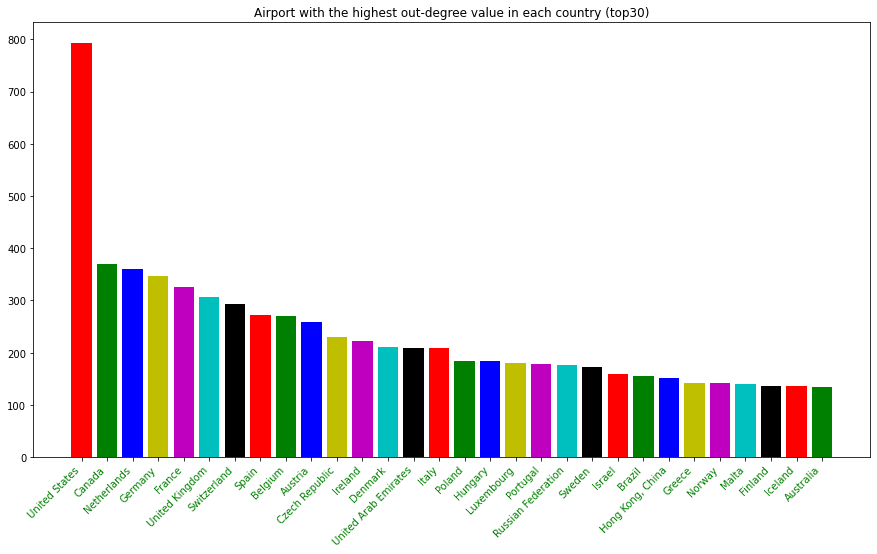

In [9]:
hub_2019_country = hub_2019.groupby(['Country'], sort=True)['degree_out'].max().reset_index()
hub_2019_country = hub_2019_country.sort_values(by = 'degree_out', ascending=False)

display(hub_2019_country)

X = hub_2019_country.Country.iloc[:30]
Y = hub_2019_country.degree_out.iloc[:30]

plt.figure(figsize=(15,8))
plt.title('Airport with the highest out-degree value in each country (top30)')
plt.bar(X, Y, color = ['r','g','b','y','m','c','k','r','g','b','y','m','c','k','r','g','b','y','m','c','k','r','g','b','y','m','c','k','r','g'])
plt.xticks(color = 'green',rotation = 45, horizontalalignment = 'right')

plt.show()

Location  degree_out
2015                              Teterboro, New Jersey       793.0
418                                   Chicago, Illinois       792.0
530                        Dallas and Fort Worth, Texas       657.0
105                                    Atlanta, Georgia       649.0
639   Fairfax County and Loudoun County, Virginia (n...       634.0
...                                                 ...         ...
1392                             New Philadelphia, Ohio         1.0
1378                                              Naxos         1.0
1377                         Navegantes, Santa Catarina         1.0
1373                         Narromine, New South Wales         1.0
2287                                             Žilina         1.0

[2288 rows x 2 columns]

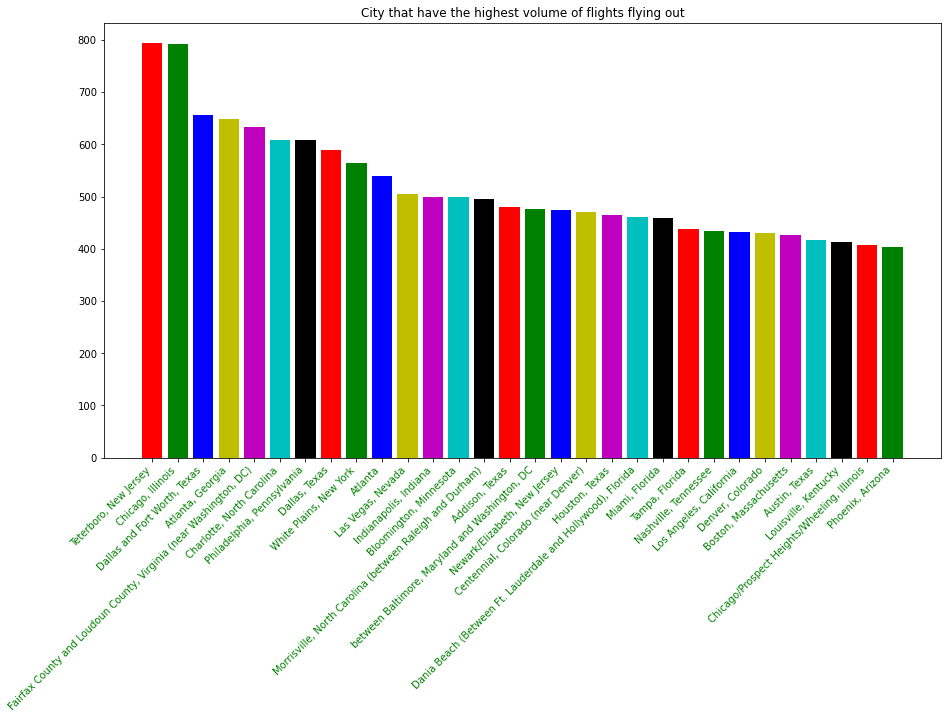

In [10]:
hub_2019_Location = hub_2019.groupby(['Location'], sort=True)['degree_out'].max().reset_index()
hub_2019_Location = hub_2019_Location.sort_values(by = 'degree_out', ascending=False)

display(hub_2019_Location)

X = hub_2019_Location.Location.iloc[:30]
Y = hub_2019_Location.degree_out.iloc[:30]

plt.figure(figsize=(15,8))
plt.title('City that have the highest volume of flights flying out')
plt.bar(X, Y, color = ['r','g','b','y','m','c','k','r','g','b','y','m','c','k','r','g','b','y','m','c','k','r','g','b','y','m','c','k','r','g'])
plt.xticks(color = 'green',rotation = 45, horizontalalignment = 'right')

plt.show()

### Further analysis on 2019 origin airport hubs (Country and City level)

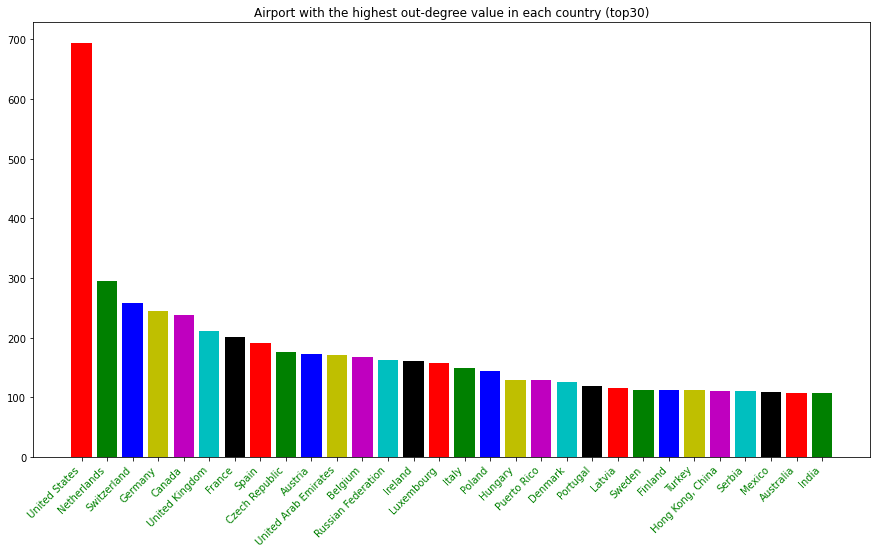

In [46]:
hub_2020_country = hub_2020.groupby(['Country'], sort=True)['degree_out'].max().reset_index()
hub_2020_country = hub_2020_country.sort_values(by = 'degree_out', ascending=False)

#display(hub_2019_country)

X = hub_2020_country.Country.iloc[:30]
Y = hub_2020_country.degree_out.iloc[:30]

plt.figure(figsize=(15,8))
plt.title('Airport with the highest out-degree value in each country (top30)')
plt.bar(X, Y, color = ['r','g','b','y','m','c','k','r','g','b','y','m','c','k','r','g','b','y','m','c','k','r','g','b','y','m','c','k','r','g'])
plt.xticks(color = 'green',rotation = 45, horizontalalignment = 'right')

plt.show()

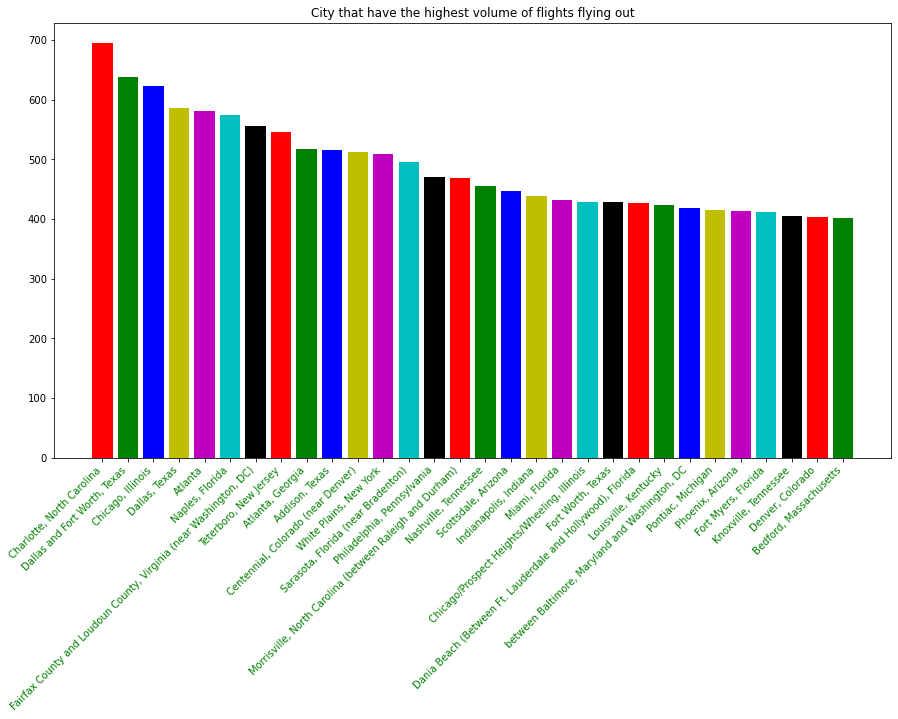

In [47]:
hub_2020_Location = hub_2020.groupby(['Location'], sort=True)['degree_out'].max().reset_index()
hub_2020_Location = hub_2020_Location.sort_values(by = 'degree_out', ascending=False)

#display(hub_2020_Location)

X = hub_2020_Location.Location.iloc[:30]
Y = hub_2020_Location.degree_out.iloc[:30]

plt.figure(figsize=(15,8))
plt.title('City that have the highest volume of flights flying out')
plt.bar(X, Y, color = ['r','g','b','y','m','c','k','r','g','b','y','m','c','k','r','g','b','y','m','c','k','r','g','b','y','m','c','k','r','g'])
plt.xticks(color = 'green',rotation = 45, horizontalalignment = 'right')

plt.show()

### Output csv. file of the 2019 airport hubs

In [90]:
display(hub_2019)
hub_2019.to_csv(r'C:\Users\Joyce Huang\Downloads\DBA5104 - Introduction to Network Science & Analytics\final_project\2019_hub_0328.csv', index=False)

Country               Location                            Name  \
108030  United States  Teterboro, New Jersey               Teterboro Airport   
107742  United States  Teterboro, New Jersey               Teterboro Airport   
107755  United States  Teterboro, New Jersey               Teterboro Airport   
107754  United States  Teterboro, New Jersey               Teterboro Airport   
107753  United States  Teterboro, New Jersey               Teterboro Airport   
...               ...                    ...                             ...   
26281        Slovakia                 Žilina                  Žilina Airport   
64724   United States     Grants, New Mexico  Grants-milan Municipal Airport   
26401        Slovenia       Ptuj (Moškanjci)                    Ptuj Airport   
26534    South Africa               Pretoria              Wonderboom Airport   
85480   United States     New Ulm, Minnesota       New Ulm Municipal Airport   

       origin destination  degree_in  degree_out  nbr_of_trips  
108030   KTEB        MDBE      584.0       793.0             2  
107742   KTEB        KERV      584.0       793.0             1  
107755   KTEB        KFMY      584.0       793.0             1  
107754   KTEB        KFMH      584.0       793.0             1  
107753   KTEB        KFLL      584.0       793.0            61  
...       ...         ...        ...         ...           ...  
26281    LZZI        LKVY        0.0         1.0             1  
64724    KGNT        KABQ        3.0         1.0             2  
26401    LJPT        LJCE       13.0         1.0             1  
26534    FAWB        FACT        1.0         1.0             1  
85480    KULM        MN74        5.0         1.0             1  

[114538 rows x 8 columns]

### Output csv. file of the 2020 airport hubs

In [89]:
display(hub_2020)
hub_2020.to_csv(r'C:\Users\Joyce Huang\Downloads\DBA5104 - Introduction to Network Science & Analytics\final_project\2020_hub_0328.csv', index=False)

Country                        Location  \
43181   United States       Charlotte, North Carolina   
43227   United States       Charlotte, North Carolina   
43219   United States       Charlotte, North Carolina   
43220   United States       Charlotte, North Carolina   
43221   United States       Charlotte, North Carolina   
...               ...                             ...   
68073   United States                 Iowa City, Iowa   
113459  United States              Vincennes, Indiana   
32212   United States          Angel Fire, New Mexico   
13593          Greece                 Argos, Kalymnos   
3553           Brazil  Rio de Janeiro, Rio de Janeiro   

                                           Name origin destination  degree_in  \
43181   Charlotte/douglas International Airport   KCLT        KJYO      429.0   
43227   Charlotte/douglas International Airport   KCLT        KNY2      429.0   
43219   Charlotte/douglas International Airport   KCLT        KMSP      429.0   
43220   Charlotte/douglas International Airport   KCLT        KMTN      429.0   
43221   Charlotte/douglas International Airport   KCLT        KMTV      429.0   
...                                         ...    ...         ...        ...   
68073               Iowa City Municipal Airport   KIOW        KFKA        3.0   
113459                           O'neal Airport   KOEA        0NC8        0.0   
32212                        Angel Fire Airport   KAXX        KGKY        4.0   
13593          Kalymnos Island National Airport   LGKY        LGAV        0.0   
3553                        Jacarepagua Airport   SBJR        SBGL        3.0   

        degree_out  nbr_of_trips  
43181        694.0             2  
43227        694.0             7  
43219        694.0           142  
43220        694.0             4  
43221        694.0            17  
...            ...           ...  
68073          1.0             1  
113459         1.0             1  
32212          1.0             1  
13593          1.0             1  
3553           1.0             2  

[116291 rows x 8 columns]

### Output csv. file of the 2019 ORIGIN airport hubs

In [103]:
hub_2019_origin = hub_2019.groupby(['Country','Location','Name','origin'], sort=True)['degree_out'].max().reset_index()
hub_2019_origin = hub_2019_origin.sort_values(by = 'degree_out', ascending=False)
#hub_2019_origin.to_csv(r'C:\Users\Joyce Huang\Downloads\DBA5104 - Introduction to Network Science & Analytics\final_project\2019_hubs_origin.csv',index=False)

### Output csv. file of the 2020 ORIGIN airport hubs

In [101]:
hub_2020_origin = hub_2020.groupby(['Country','Location','Name','origin'], sort=True)['degree_out'].max().reset_index()
hub_2020_origin = hub_2020_origin.sort_values(by = 'degree_out', ascending=False)
#hub_2020_origin.to_csv(r'C:\Users\Joyce Huang\Downloads\DBA5104 - Introduction to Network Science & Analytics\final_project\2020_hubs_origin.csv',index=False)